In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import scipy.stats as st
from scipy.stats import linregress
import time
from datetime import date
%matplotlib inline


In [7]:
#Study the summary_data
summary_path = "Data/Summary_Data.csv"

#Read the Covid summary data
summary_data = pd.read_csv(summary_path)
summary_data.rename(columns={'Unnamed: 0': 'Dates'}, inplace = True)
summary_data

#summary_data['Month'] = pd.DatetimeIndex(summary_data['Dates']).month


summary_data_result = summary_data[(pd.to_datetime(summary_data['Dates']).dt.strftime('%Y%m%d')) >= '20190601']
summary_data_result['YYMM'] = pd.to_datetime(summary_data_result['Dates']).dt.strftime('%y-%m')
summary_data_result


#summary_data['New Dates'] = pd.to_datetime(summary_data['Dates']).dt.strftime('%y-%m')
#summary_data

#summary_data_reduce = summary_data[summary_data.Dates>='21-01-2019']
#summary_data_reduce



<ipython-input-7-f0b45a76f65e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_result['YYMM'] = pd.to_datetime(summary_data_result['Dates']).dt.strftime('%y-%m')


,Dates,Pedestrians_Count,Lockdown_Stage,Vehicle_Count,Covid_Cases,YYMM
10,01-01-2020,710047,Stage 0,13996.0,0.0,20-01
11,01-01-2021,396955,Stage 0,NaN,10.0,21-01
22,01-02-2020,761505,Stage 0,19155.0,0.0,20-01
23,01-02-2021,349099,Stage 0,NaN,0.0,21-01
34,01-03-2020,706476,Stage 0,16766.0,2.0,20-01
...,...,...,...,...,...,...
4390,31-08-2020,102497,Stage 4,NaN,57.0,20-08
4401,31-10-2019,791985,Stage 0,23824.0,0.0,19-10
4402,31-10-2020,370181,Stage 2,NaN,0.0,20-10
4413,31-12-2019,950487,Stage 0,20052.0,0.0,19-12


In [8]:
summary_data_result['Ped_Count_0000'] = summary_data_result['Pedestrians_Count']/10000

<ipython-input-8-80968bc8b947>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_result['Ped_Count_0000'] = summary_data_result['Pedestrians_Count']/10000


In [13]:

summary_data_stage = summary_data_result.groupby(['YYMM','Lockdown_Stage']).agg({'Covid_Cases' :'sum','Ped_Count_0000':'sum'})  
summary_data_stage


,,Covid_Cases,Ped_Count_0000
YYMM,Lockdown_Stage,,
19-06,Stage 0,0.0,2019.4222
19-07,Stage 0,0.0,2274.4685
19-08,Stage 0,0.0,2389.6524
19-09,Stage 0,0.0,2110.7792
19-10,Stage 0,0.0,2473.8547
19-11,Stage 0,0.0,2348.7511
19-12,Stage 0,0.0,2493.1172
20-01,Stage 0,796.0,2318.9121
20-02,Stage 0,557.0,2185.3368


In [15]:
summary_data_stage.to_csv('Data/Summary_data_stages.csv')

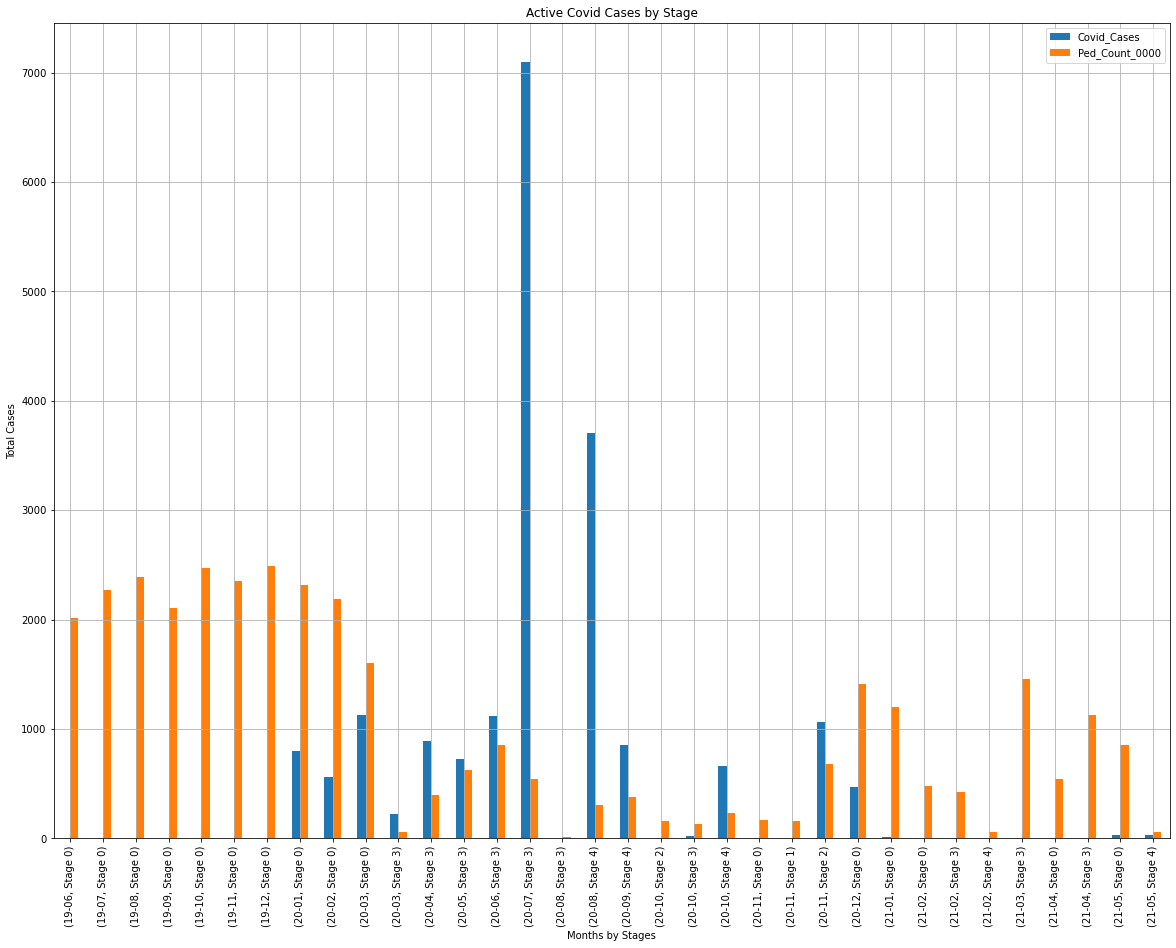

In [19]:
plotchart = summary_data_stage
plotchart.plot(y=['Covid_Cases','Ped_Count_0000'], kind = "bar", figsize=(20, 15))

plt.title("Active Covid Cases by Stage")
plt.xlabel("Months by Stages")
plt.ylabel("Total Cases")
plt.grid()
plt.show


plt.savefig('Images/active_covid_stages_bar.png')








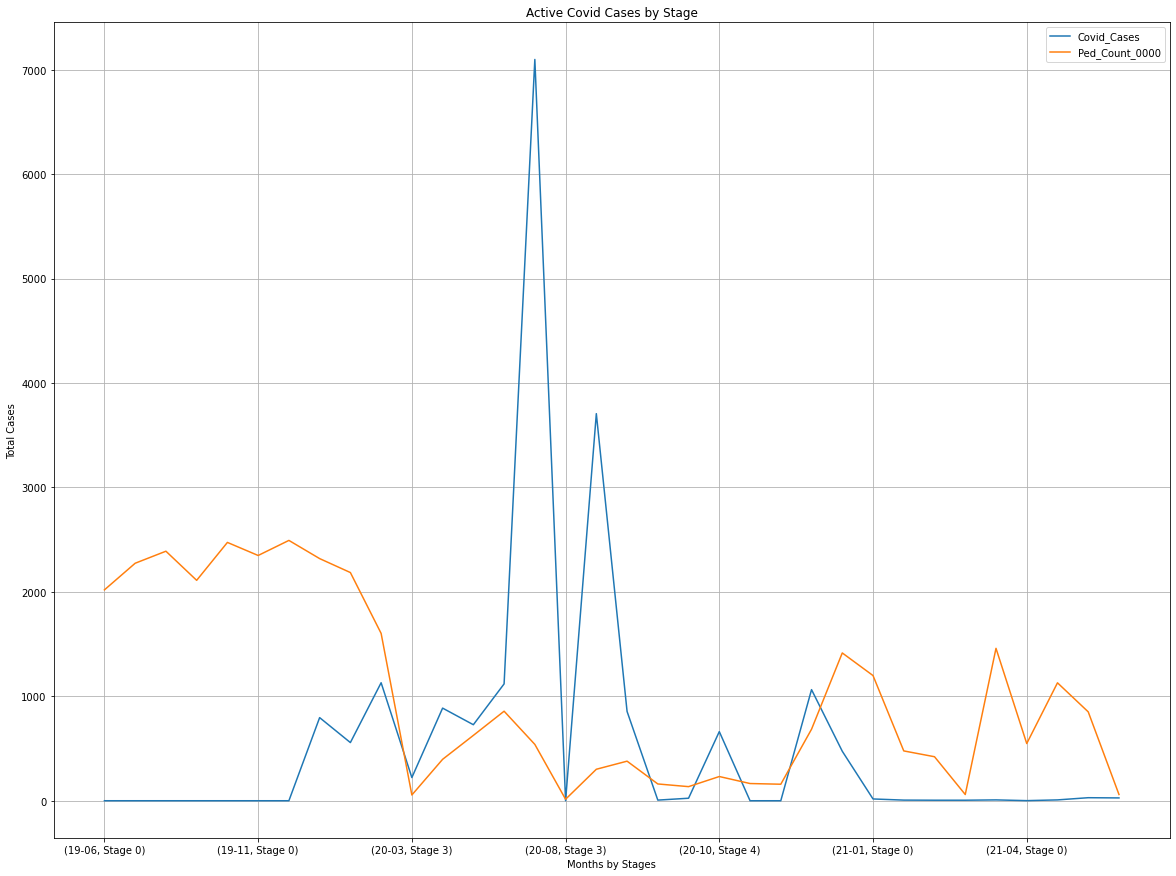

In [20]:
plotchart.plot(y=['Covid_Cases','Ped_Count_0000'], kind = "line", figsize=(20, 15))
plt.title("Active Covid Cases by Stage")
plt.xlabel("Months by Stages")
plt.ylabel("Total Cases")
plt.grid()
plt.show


plt.savefig('Images/active_covid_stages_line.png')